- **Purpose:** Data visualization using the ggplot2 package
- **Author:** Tamim Ahsan
- **Date:** March 21, 2025

# 1. Load libraries and dataframe

In [3]:
# Install visdat package
install.packages(c("visdat", "ggpubr", "cowplot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [4]:
# Load packages
library(tidyverse)
library(datasets)
library(visdat)
library(ggpubr)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




In [5]:
# Load visdat package
library(visdat)

In [6]:
# Look at a dataframe
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [7]:
# glimpse into dataframe
glimpse(airquality)

Rows: 153
Columns: 6
$ Ozone   <int> 41, 36, 12, 18, NA, 28, 23, 19, 8, NA, 7, 16, 11, 14, 18, 14, …
$ Solar.R <int> 190, 118, 149, 313, NA, NA, 299, 99, 19, 194, NA, 256, 290, 27…
$ Wind    <dbl> 7.4, 8.0, 12.6, 11.5, 14.3, 14.9, 8.6, 13.8, 20.1, 8.6, 6.9, 9…
$ Temp    <int> 67, 72, 74, 62, 56, 66, 65, 59, 61, 69, 74, 69, 66, 68, 58, 64…
$ Month   <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,…
$ Day     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…


In [8]:
# Summarize dataframe
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

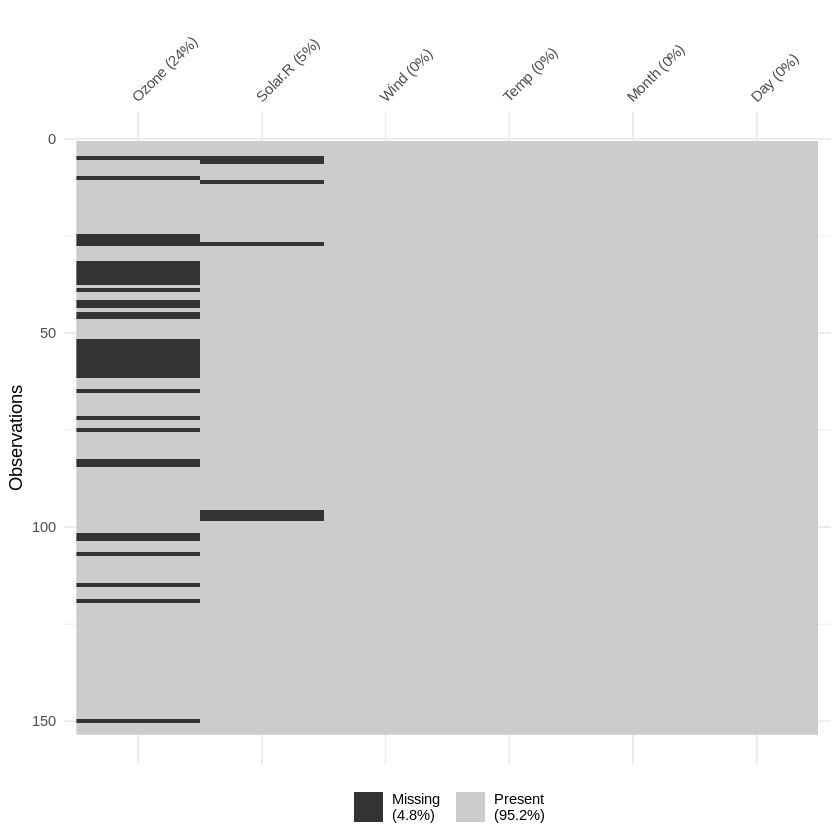

In [9]:
# NA values
vis_miss(airquality)

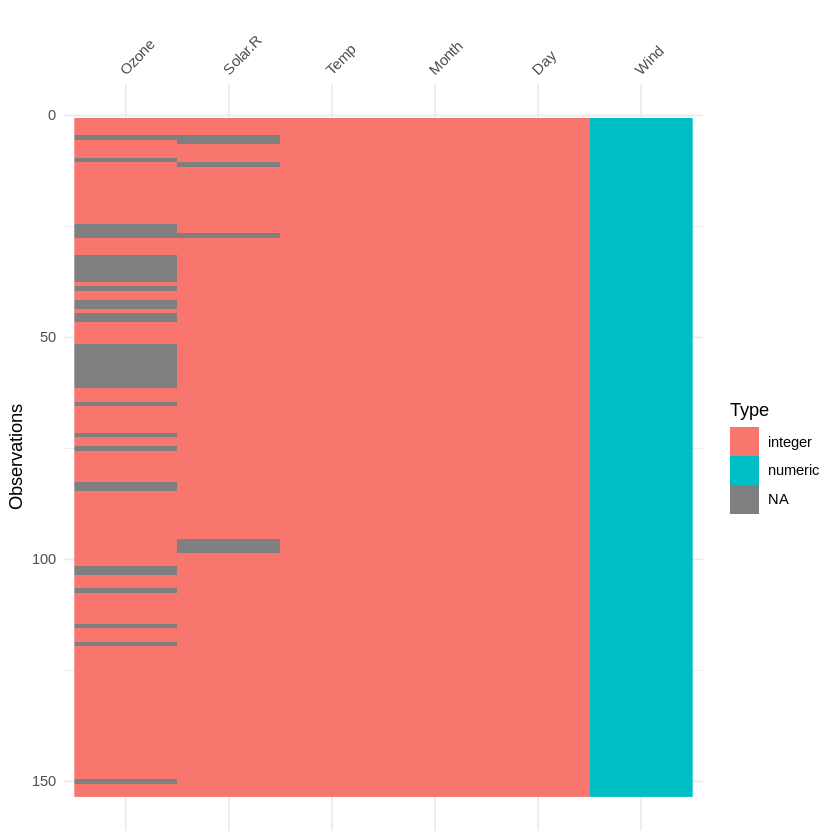

In [10]:
# Visualize missing data
vis_dat(airquality)

In [11]:
# Remove NA values
df <- airquality |>
  na.omit()

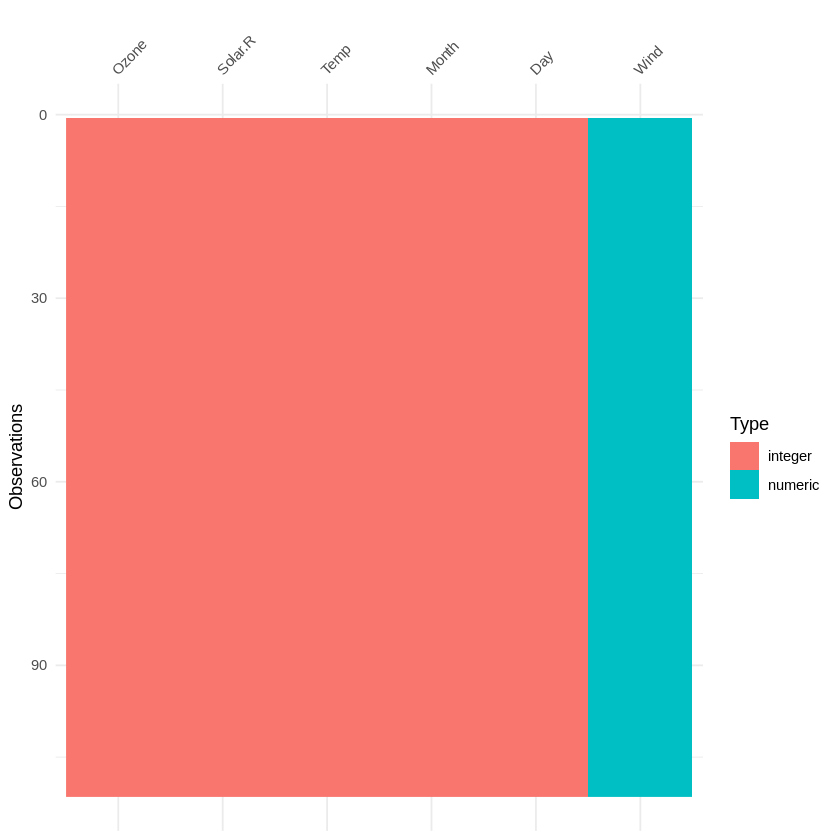

In [12]:
# Visualize the data again
vis_dat(df)

In [13]:
# Dimensions
print(paste0("Number of rows of the dataframe before NA removal: ", nrow(airquality)))
print(paste0("Number of rows of the dataframe after NA removal: ", nrow(df)))

[1] "Number of rows of the dataframe before NA removal: 153"
[1] "Number of rows of the dataframe after NA removal: 111"


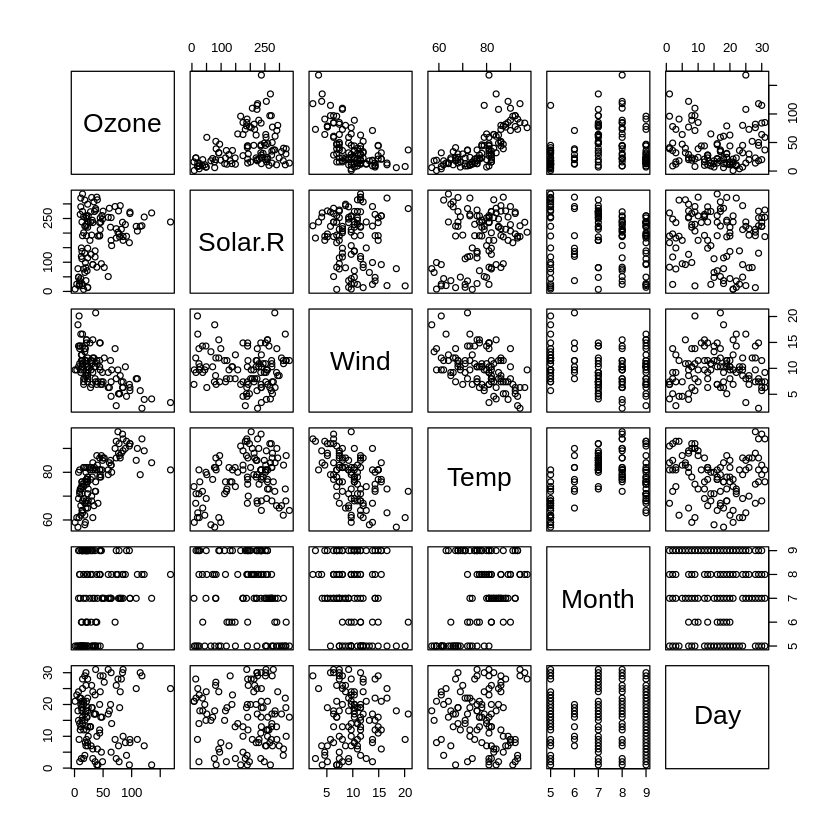

In [36]:
# Correlation plot
plot(df)

# 2. Basic plotting

## 2.1 Scatter plot

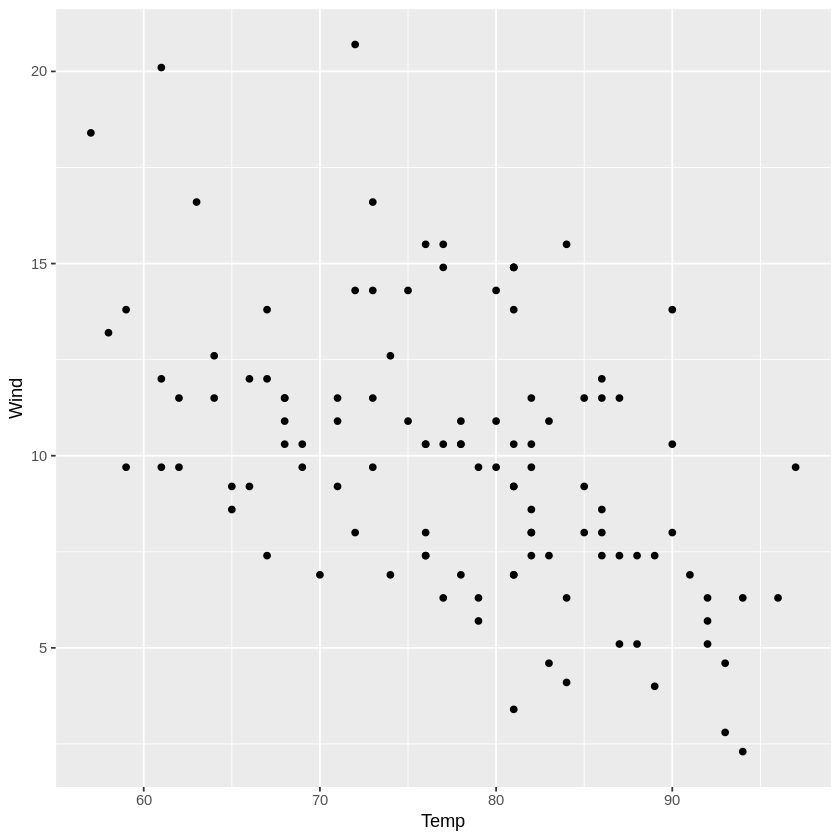

In [14]:
# scatter plot
scat_plot <- df |>
  ggplot(aes(x = Temp, y = Wind)) +
  geom_point()

scat_plot

`geom_smooth()` using formula = 'y ~ x'


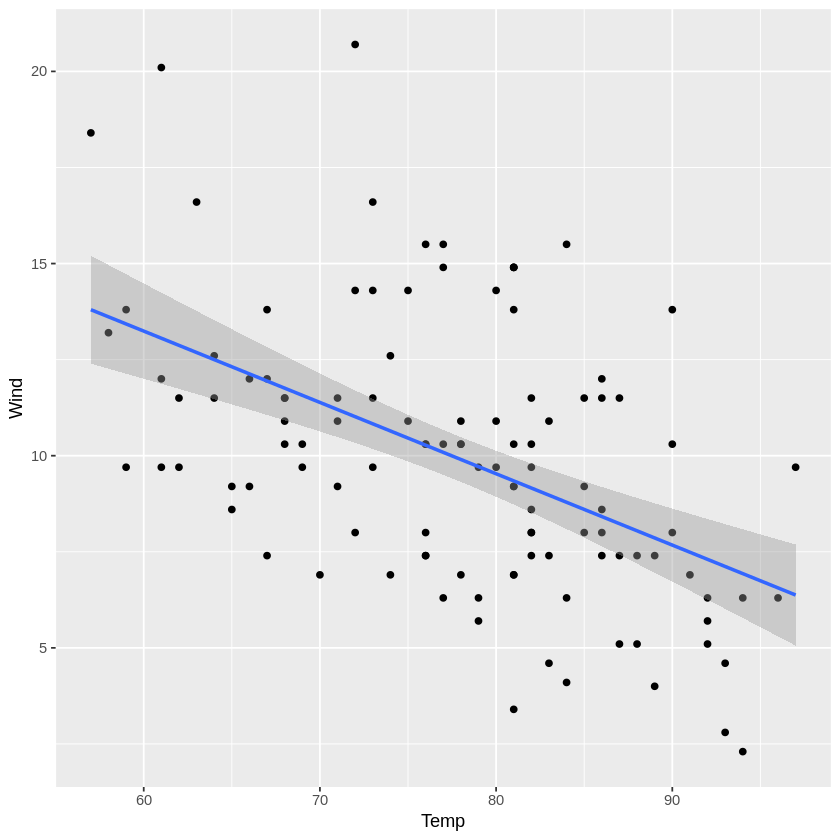

In [15]:
# Add a line to the scatter plot
scat_plot + geom_smooth(method = "lm")

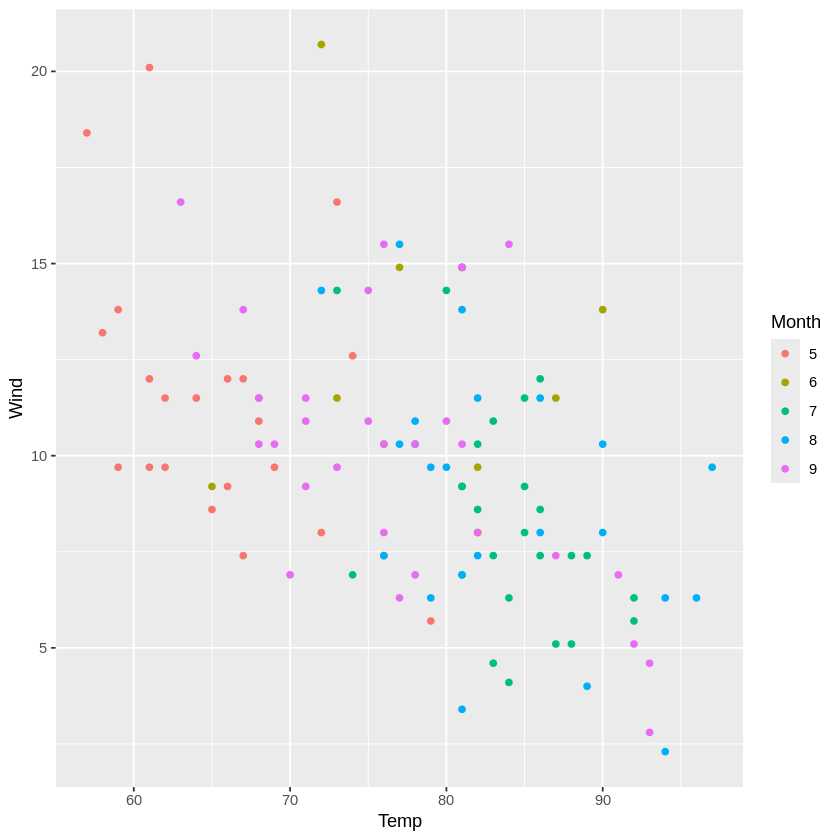

In [16]:
# Scatter plot with color
scat_plot_col <- df |>
  mutate_at("Month", as.factor) |>
  ggplot(aes(x = Temp, y = Wind, color = Month)) +
  geom_point()

scat_plot_col

`geom_smooth()` using formula = 'y ~ x'


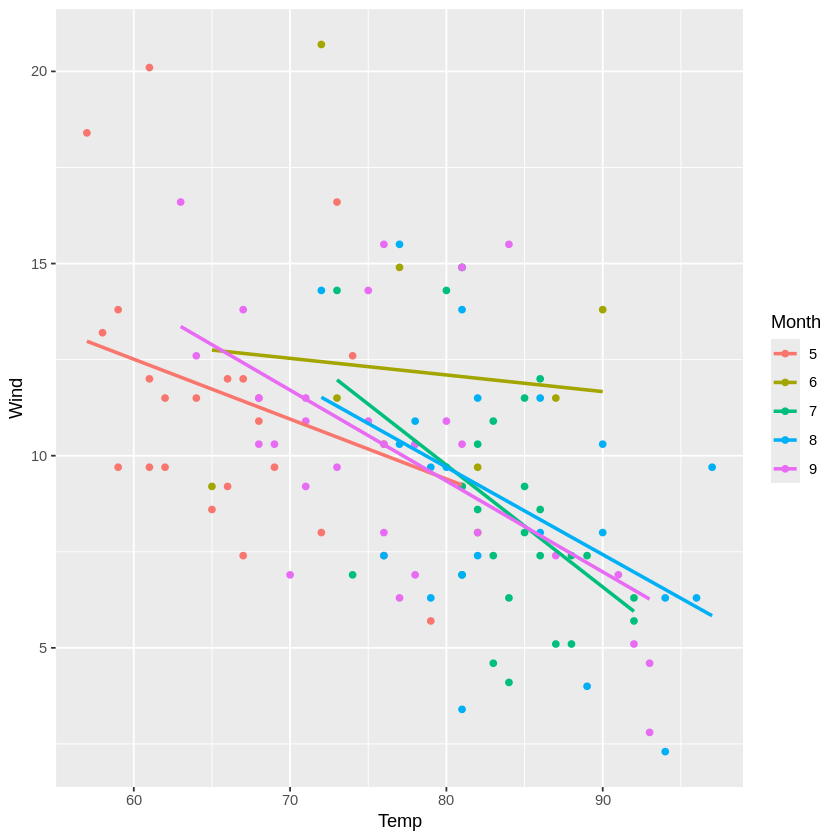

In [17]:
# Add a line to the scatter plot
scat_plot_col + geom_smooth(method = "lm", se = FALSE)

## 2.2 Barplot

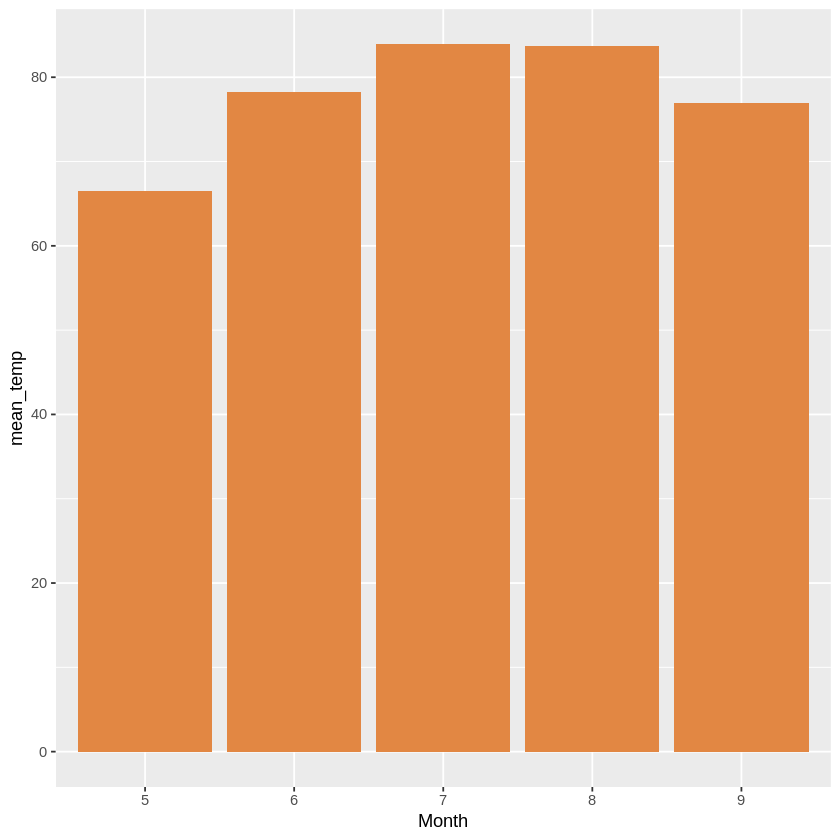

In [25]:
# Mean temperature per month
bar_plot_temp <- df |>
  mutate_at("Month", as.factor) |>
  group_by(Month) |>
  summarise(mean_temp = mean(Temp)) |>
  ggplot(aes(x = Month, y = mean_temp)) +
  geom_bar(position = "dodge", stat = "identity", fill = "#e28743")

bar_plot_temp

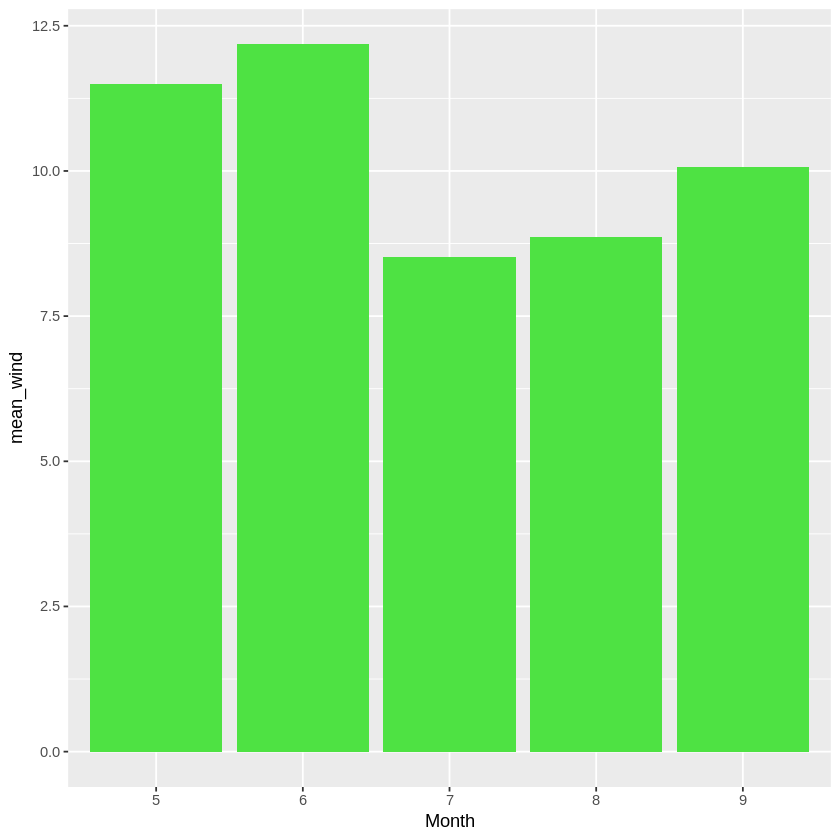

In [26]:
# Mean wind speed per month
bar_plot_wind <- df |>
  mutate_at("Month", as.factor) |>
  group_by(Month) |>
  summarise(mean_wind = mean(Wind)) |>
  ggplot(aes(x = Month, y = mean_wind)) +
  geom_bar(position = "dodge", stat = "identity", fill = "#4ee243")

bar_plot_wind

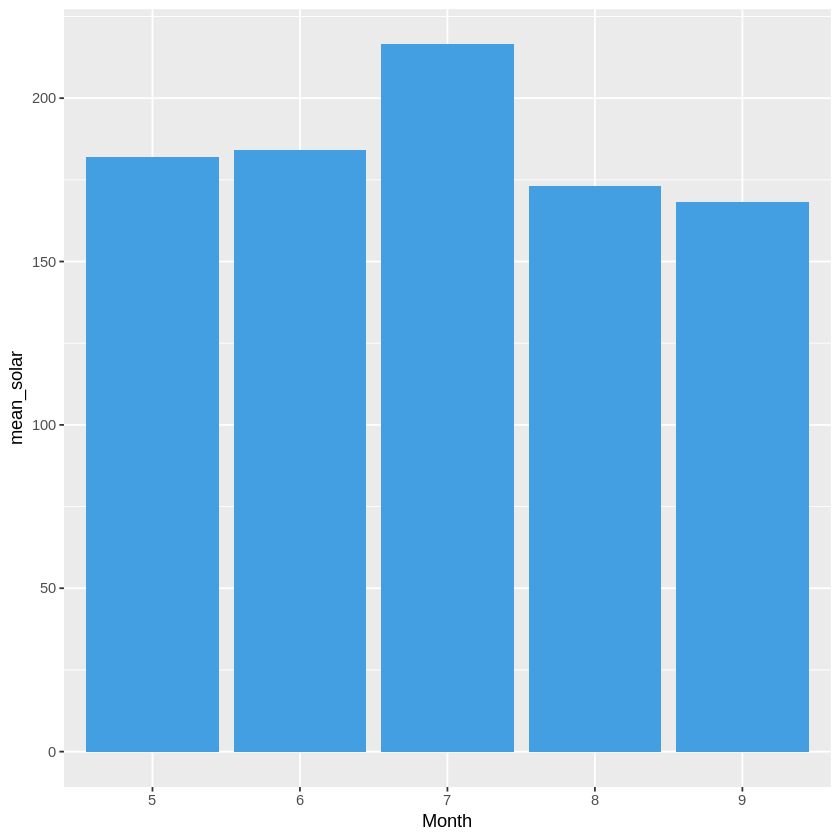

In [28]:
# Mean wind speed per month
bar_plot_solar <- df |>
  mutate_at("Month", as.factor) |>
  group_by(Month) |>
  summarise(mean_solar = mean(Solar.R)) |>
  ggplot(aes(x = Month, y = mean_solar)) +
  geom_bar(position = "dodge", stat = "identity", fill = "#439ee2")

bar_plot_solar

In [33]:
# All variables in a single plot
# Create the dataframe
summary_df <- df |>
  group_by(Month) |>
  summarise(mean_temp = mean(Temp), mean_wind = mean(Wind), mean_solar = mean(Solar.R))

summary_df <- round(summary_df, 2)
summary_df

Month,mean_temp,mean_wind,mean_solar
<dbl>,<dbl>,<dbl>,<dbl>
5,66.46,11.50,182.04
6,78.22,12.18,184.22
7,83.88,8.52,216.42
8,83.70,8.86,173.09
9,76.90,10.08,168.21


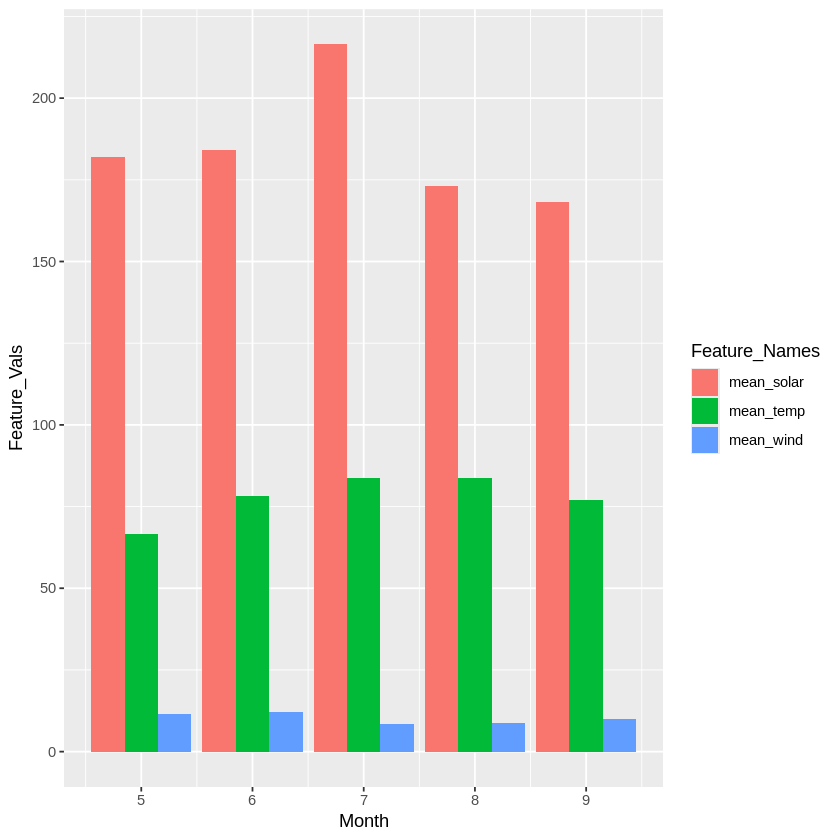

In [35]:
# All variables in a single plot
# Plot the data
summary_df |>
  pivot_longer(!Month, names_to = "Feature_Names", values_to = "Feature_Vals") |>
  ggplot(aes(x = Month, y = Feature_Vals, fill = Feature_Names)) +
  geom_bar(stat = "identity", position = "dodge")

## 2.3 Boxplot

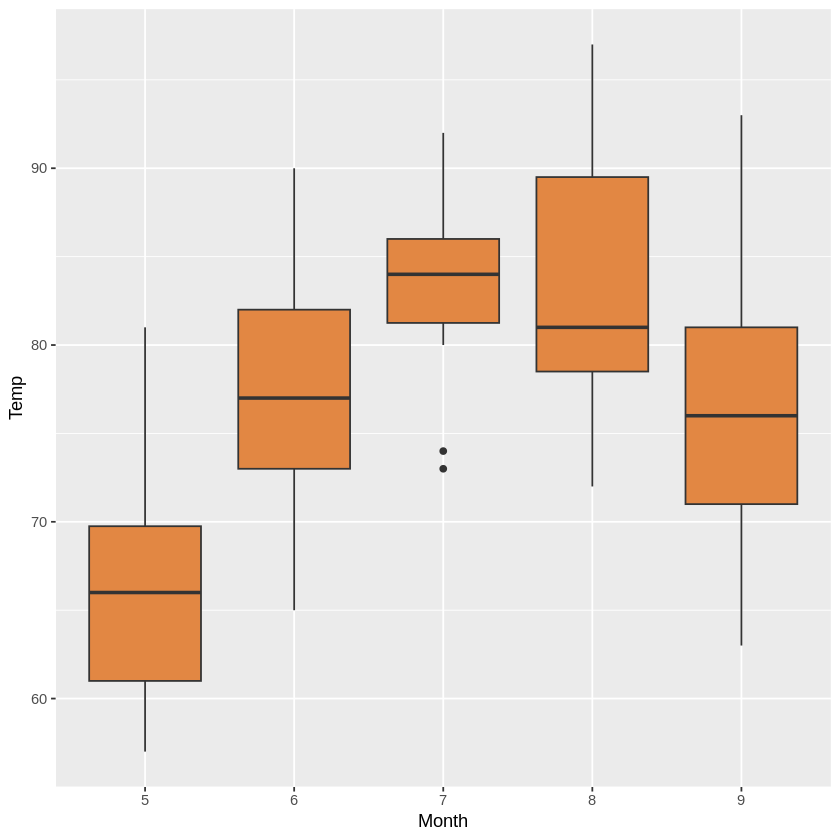

In [48]:
# Temperature
box_temp <- df |>
  mutate_at("Month", as.factor) |>
  ggplot(aes(x = Month, y = Temp)) +
  geom_boxplot(fill = "#e28743")

box_temp

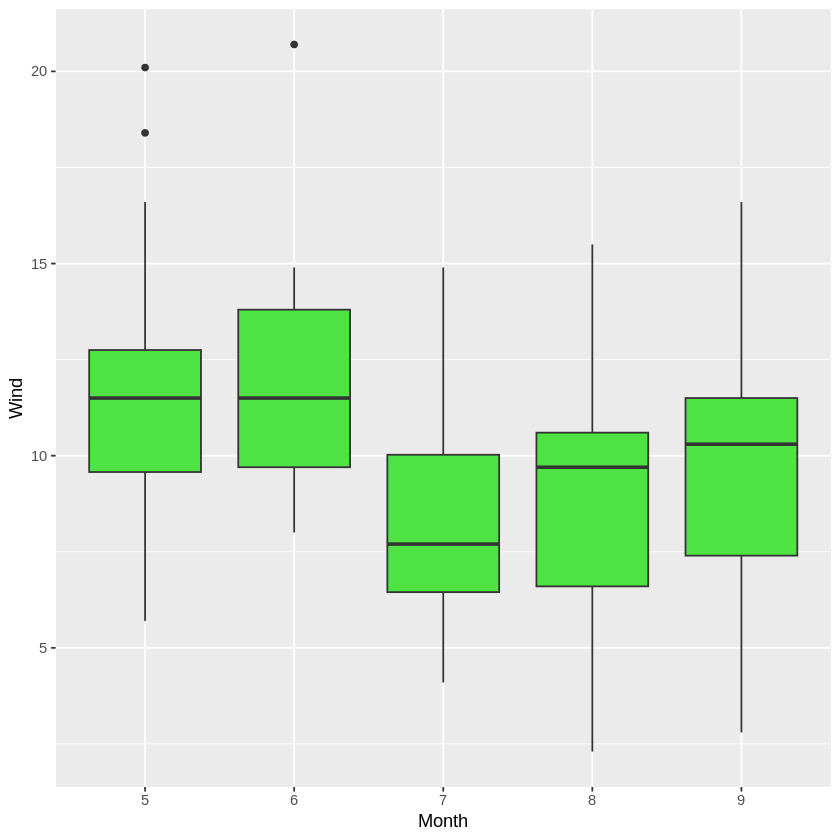

In [49]:
# Wind
box_wind <- df |>
  mutate_at("Month", as.factor) |>
  ggplot(aes(x = Month, y = Wind)) +
  geom_boxplot(fill = "#4ee243")

box_wind

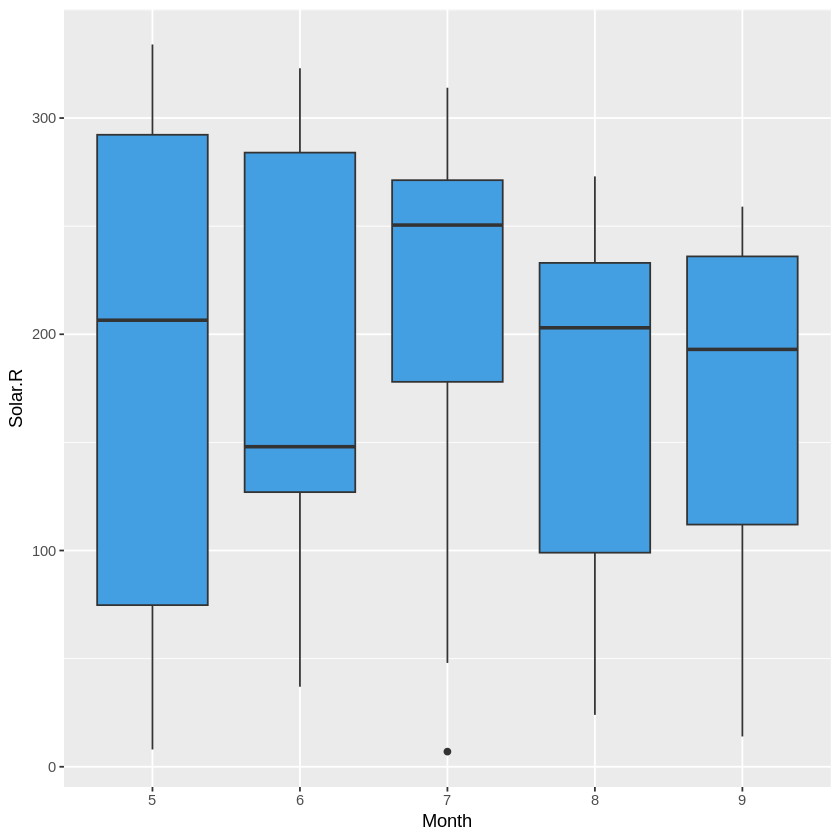

In [50]:
# Solar.R
box_solar <- df |>
  mutate_at("Month", as.factor) |>
  ggplot(aes(x = Month, y = Solar.R)) +
  geom_boxplot(fill = "#439ee2")

box_solar

# 3. Customize and Combine Plots

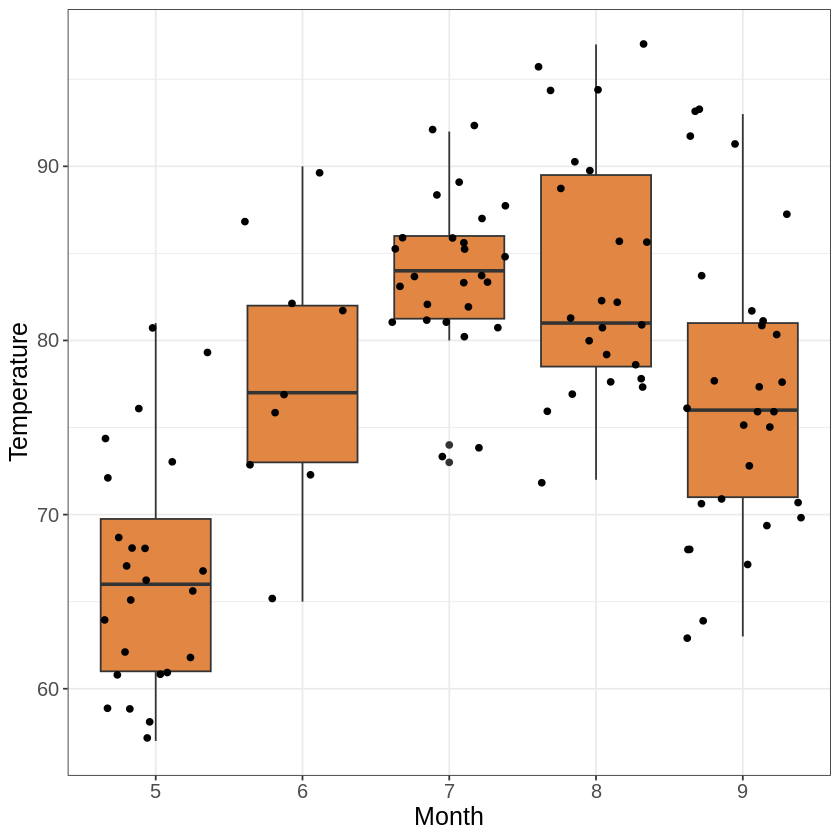

In [58]:
# Temperature
p1 <- box_temp +
  geom_jitter() +
  theme_bw() +
  labs(y = "Temperature") +
  theme(axis.title = element_text(size = 15), axis.text = element_text(size = 12))

p1

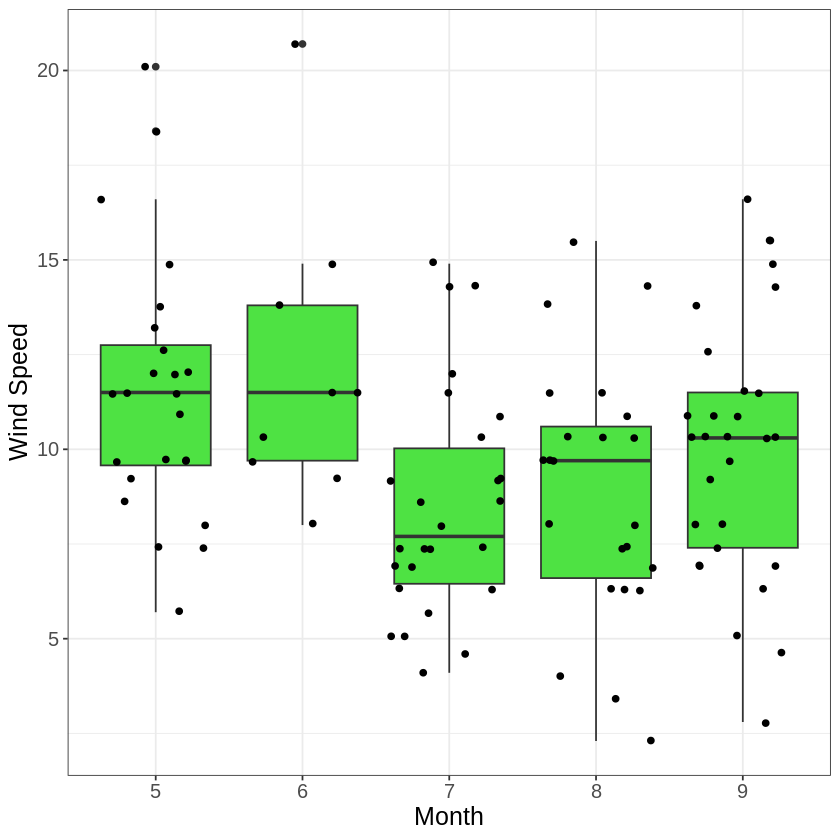

In [59]:
# Wind
p2 <- box_wind +
  geom_jitter() +
  theme_bw() +
  labs(y = "Wind Speed") +
  theme(axis.title = element_text(size = 15), axis.text = element_text(size = 12))

p2

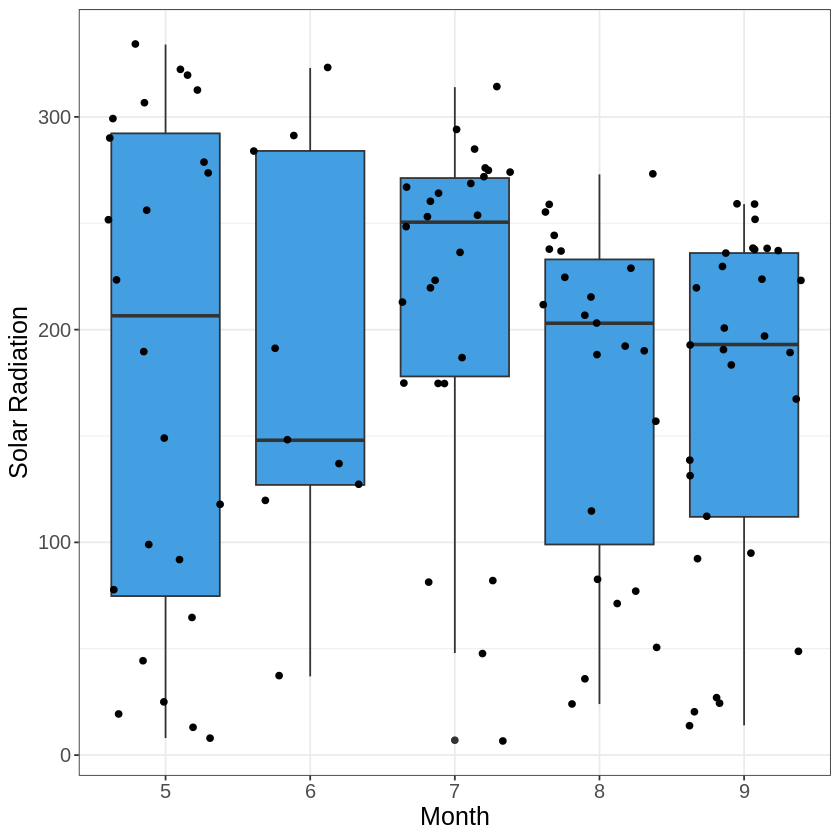

In [60]:
# Solar Radiation
p3 <- box_solar +
  geom_jitter() +
  theme_bw() +
  labs(y = "Solar Radiation") +
  theme(axis.title = element_text(size = 15), axis.text = element_text(size = 12))

p3

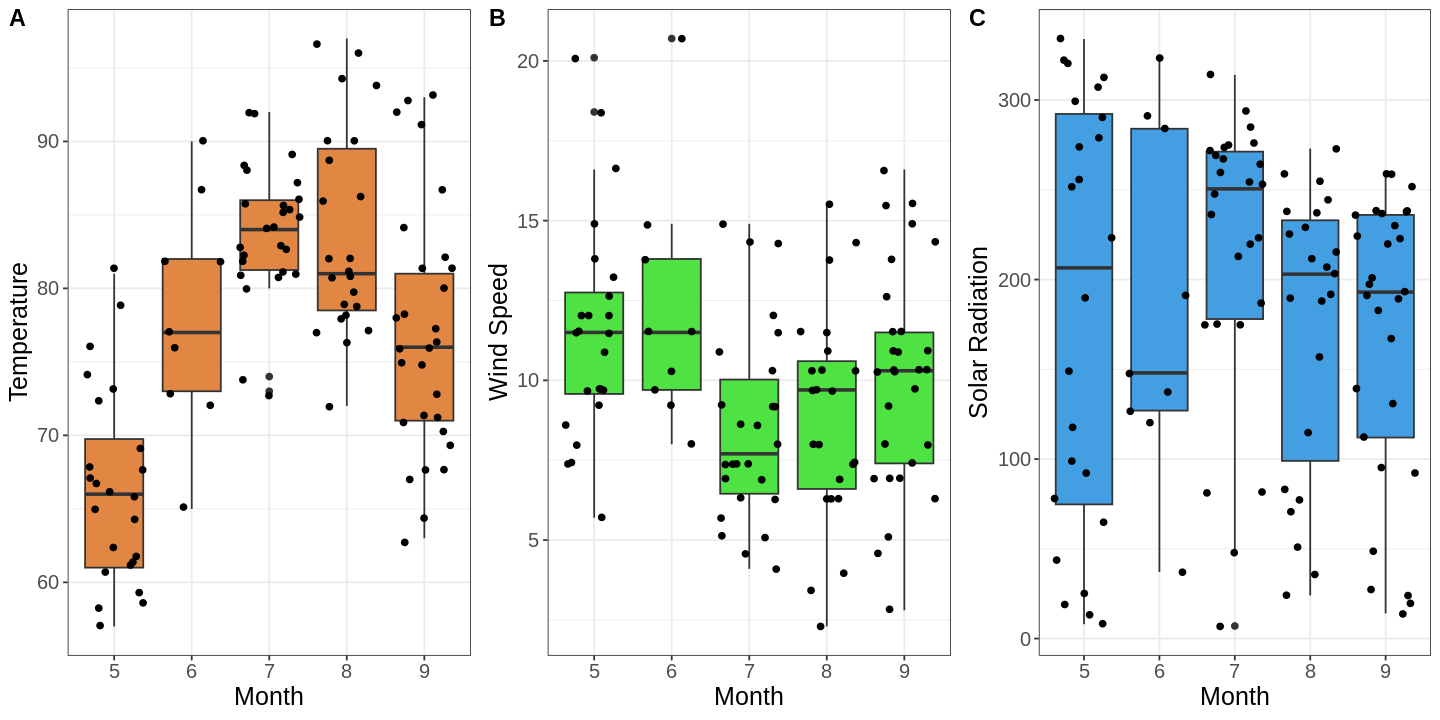

In [63]:
# Combine plots using ggarrange function
options(repr.plot.width = 12, repr.plot.height = 6) # Adjust plot dimensions
ggarrange(p1, p2, p3,
labels = c("A", "B", "C"),
ncol = 3,
nrow = 1)

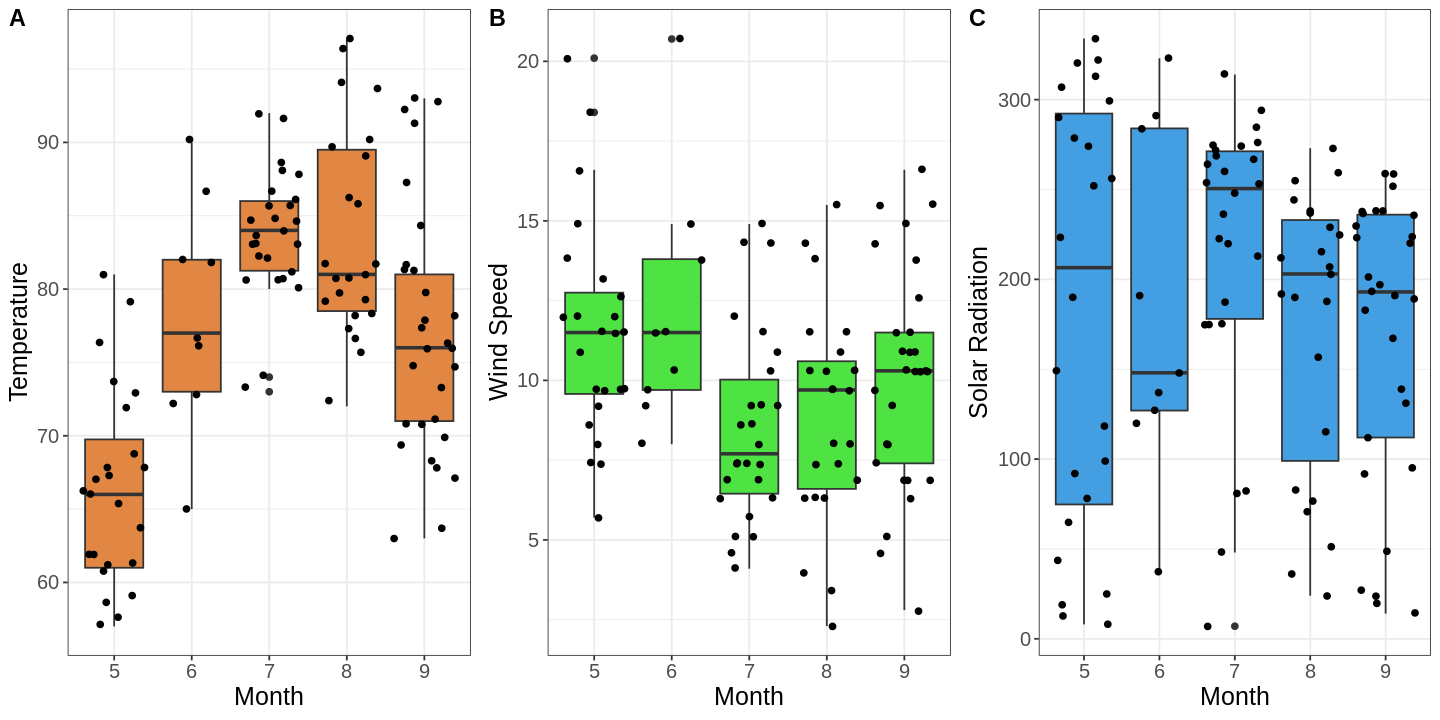

In [65]:
# Combine plots with the plot_grid function
plot_grid(p1, p2, p3,
ncol = 3,
labels = "AUTO") # Labels were automatically selected

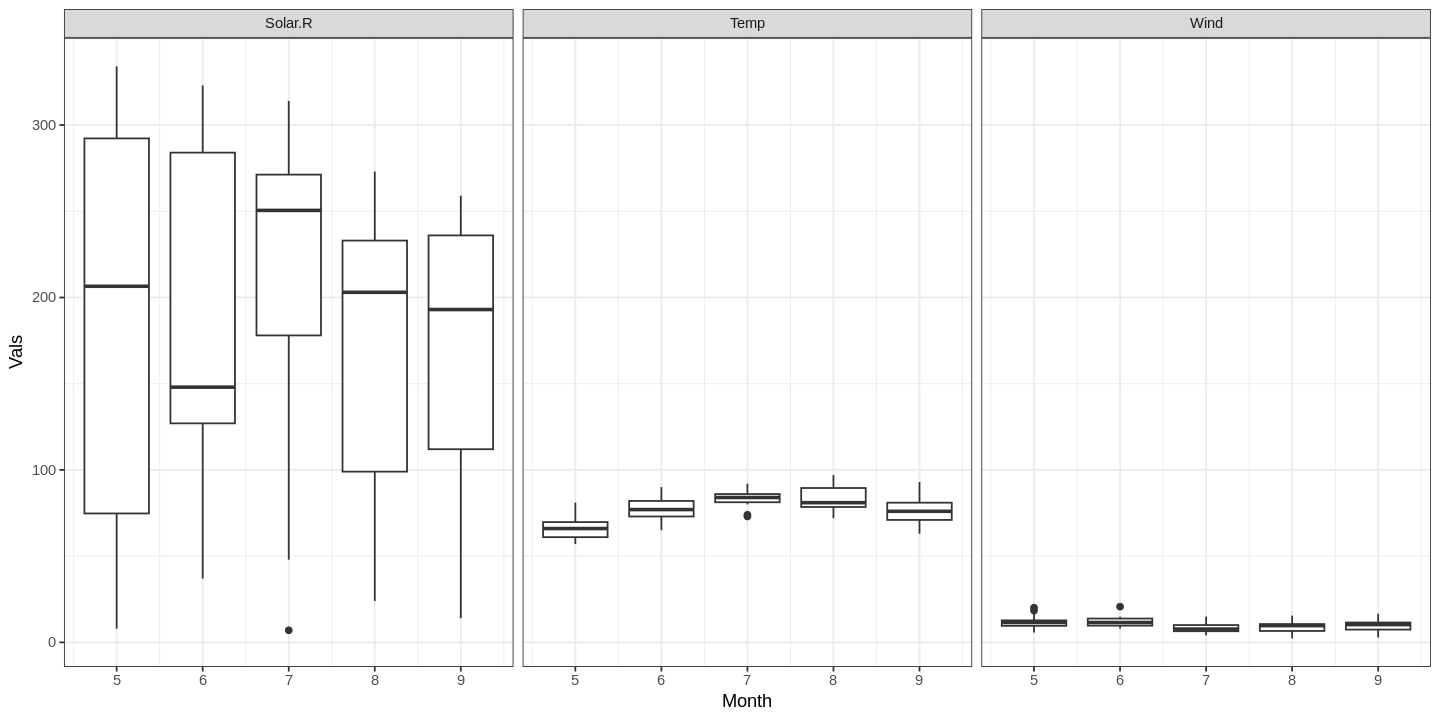

In [72]:
# Using facet wrap
df |>
  group_by(Month) |>
  pivot_longer(cols = c(Temp, Wind, Solar.R), names_to = "Names", values_to = "Vals") |>
  ggplot(aes(x = Month, y = Vals, group = Month)) +
  geom_boxplot() +
  facet_wrap(~Names) +
  theme_bw()

facet_wrap is not suitable here because of differences in scale

# 4. Plot Comparisons

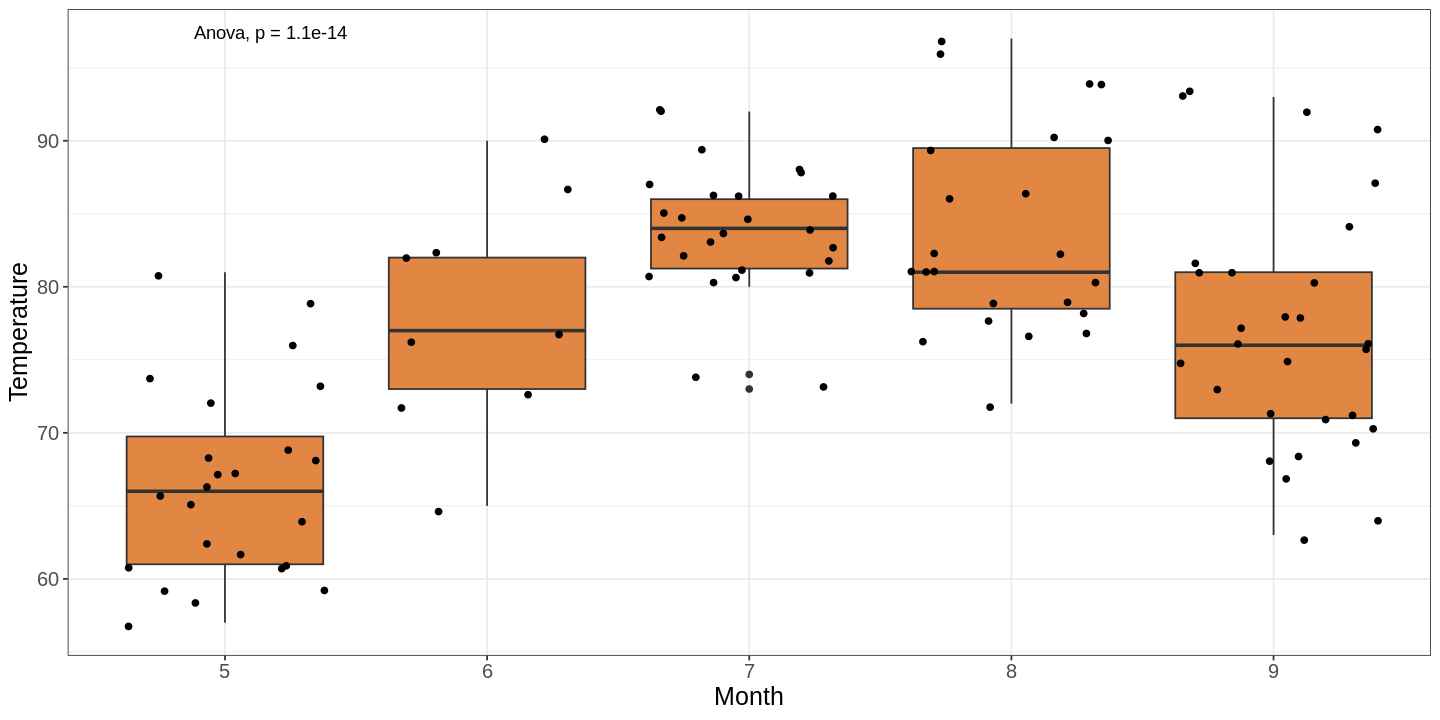

In [77]:
# Perform Anova tests to plot comparisons
p1 + stat_compare_means(method = "anova")

In [78]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cowplot_1.1.3   ggpubr_0.6.0    visdat_0.6.0    lubridate_1.9.4
 [5] forcats_1.0.0   stringr_1.5.1   dplyr_1.1.4     purrr_1.0.4    
 [9] readr_2.1.5     tidyr_1.3.1     tibb